In [96]:
import pandas as pd
df = pd.read_csv("mirror_publications_etherscan.csv")
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_nft,week_google_searches_crypto,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,26,100,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,26,100,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,26,100,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,26,100,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0


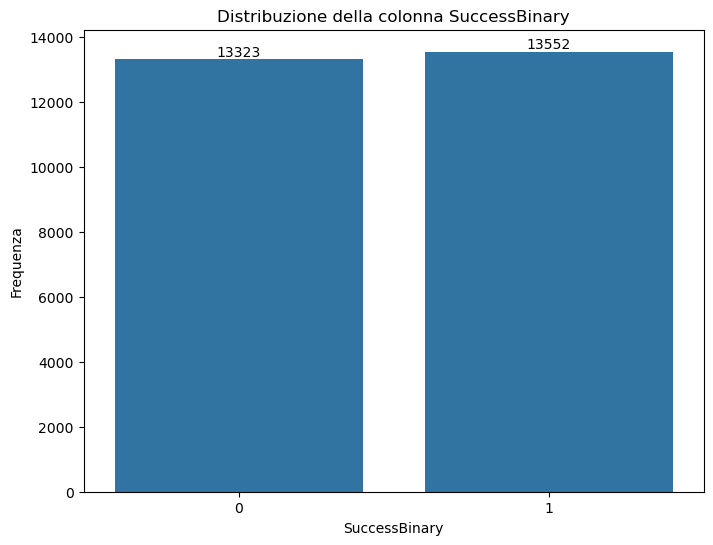

Distribuzione dei valori di 'SuccessBinary':


SuccessBinary
1    13552
0    13323
Name: count, dtype: int64

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la distribuzione della colonna 'SuccessBinary'
counts = df['SuccessBinary'].value_counts()

# Visualizza la distribuzione con un countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='SuccessBinary')

# Aggiungi i numeri sopra ogni barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Aggiungi titoli e etichette
plt.title('Distribuzione della colonna SuccessBinary')
plt.xlabel('SuccessBinary')
plt.ylabel('Frequenza')

# Mostra il grafico
plt.show()

# Mostra i numeri della distribuzione
print("Distribuzione dei valori di 'SuccessBinary':")
counts

In [98]:
# Calcoliamo i terzili per dividere i dati in 3 classi bilanciate
terzili = df["Success"].quantile([1/3, 2/3]).values

# Creiamo la colonna "SuccessClass3" in base ai terzili
df["SuccessClass3"] = pd.cut(df["Success"], bins=[-float("inf"), terzili[0], terzili[1], float("inf")], labels=[0, 1, 2])

# Calcoliamo i quartili per dividere i dati in 4 classi bilanciate
quartili = df["Success"].quantile([1/4, 2/4, 3/4]).values

# Creiamo la colonna "SuccessClass4" in base ai quartili
df["SuccessClass4"] = pd.cut(df["Success"], bins=[-float("inf"), quartili[0], quartili[1], quartili[2], float("inf")], labels=[0, 1, 2, 3])

# Verifica delle distribuzioni
class_counts_3 = df["SuccessClass3"].value_counts()
class_counts_4 = df["SuccessClass4"].value_counts()

class_counts_3, class_counts_4

(SuccessClass3
 0    11745
 2     8736
 1     6394
 Name: count, dtype: int64,
 SuccessClass4
 0    8624
 3    6688
 2    5881
 1    5682
 Name: count, dtype: int64)

In [99]:
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number,SuccessClass3,SuccessClass4
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0,2,3
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0,2,3
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0,0,0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0,2,3
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0,0,1
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0,1,2
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0,0,0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0,1,1


<h1 style="color:red;">KNN - Binaria</h1>

In [101]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      2665
           1       0.63      0.64      0.64      2710

    accuracy                           0.63      5375
   macro avg       0.63      0.63      0.63      5375
weighted avg       0.63      0.63      0.63      5375



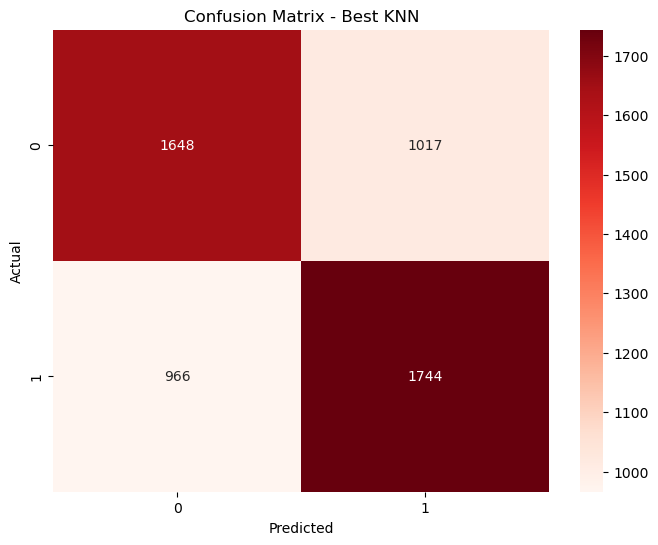

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

In [103]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2665
           1       0.80      0.75      0.78      2710

    accuracy                           0.78      5375
   macro avg       0.78      0.78      0.78      5375
weighted avg       0.78      0.78      0.78      5375



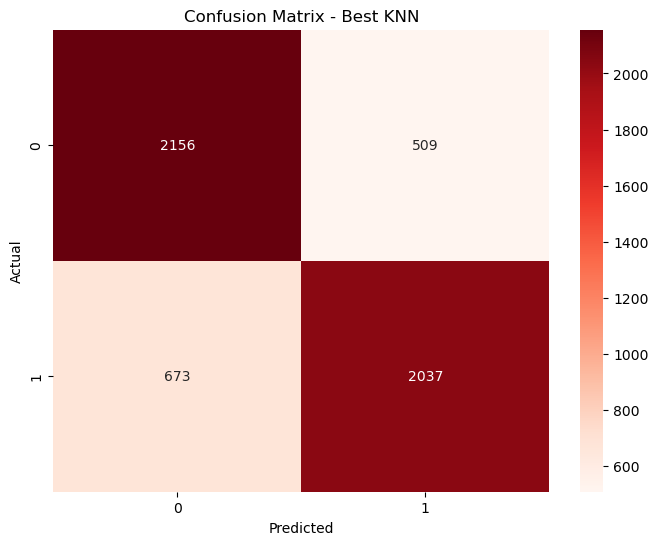

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

In [105]:
all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2665
           1       0.67      0.69      0.68      2710

    accuracy                           0.67      5375
   macro avg       0.67      0.67      0.67      5375
weighted avg       0.67      0.67      0.67      5375



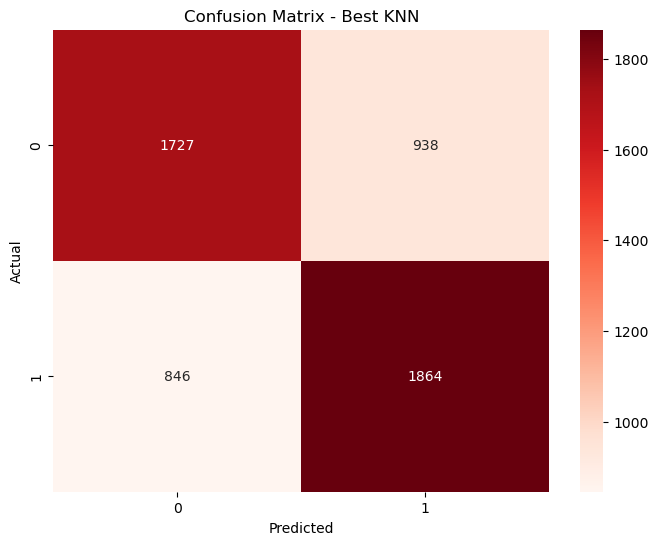

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

<h1 style="color:red;">KNN - 3 classi</h1>

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.59      2349
           1       0.33      0.24      0.28      1279
           2       0.48      0.48      0.48      1747

    accuracy                           0.49      5375
   macro avg       0.46      0.45      0.45      5375
weighted avg       0.48      0.49      0.48      5375



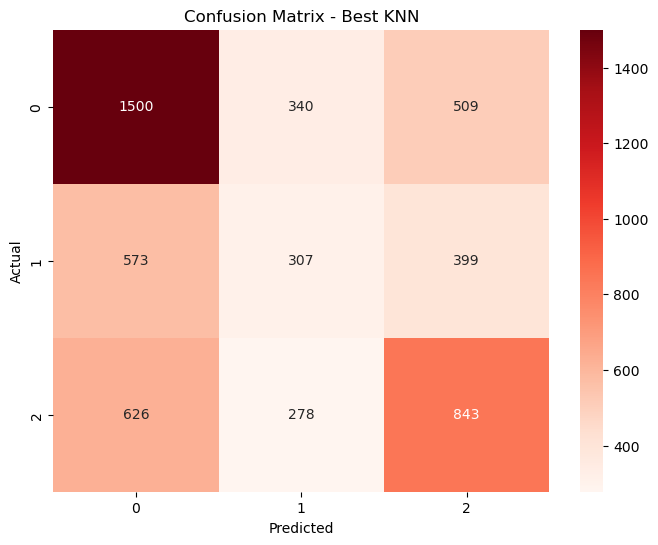

In [108]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      2349
           1       0.43      0.42      0.42      1279
           2       0.68      0.61      0.64      1747

    accuracy                           0.64      5375
   macro avg       0.61      0.60      0.61      5375
weighted avg       0.64      0.64      0.64      5375



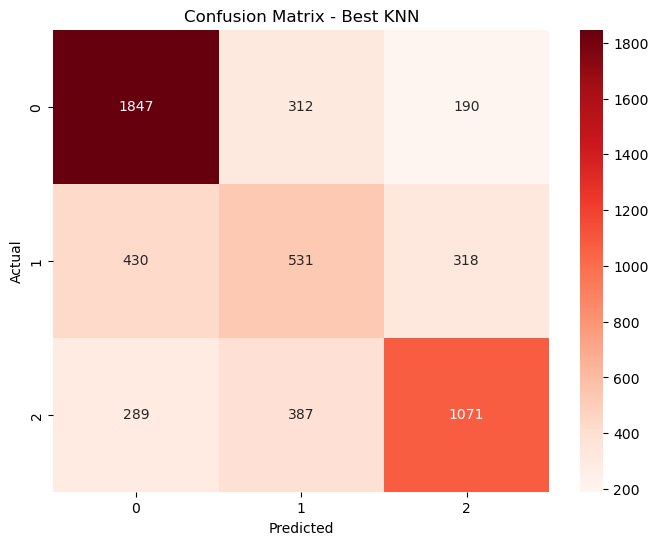

In [109]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      2349
           1       0.35      0.28      0.31      1279
           2       0.53      0.55      0.54      1747

    accuracy                           0.53      5375
   macro avg       0.49      0.49      0.49      5375
weighted avg       0.52      0.53      0.52      5375



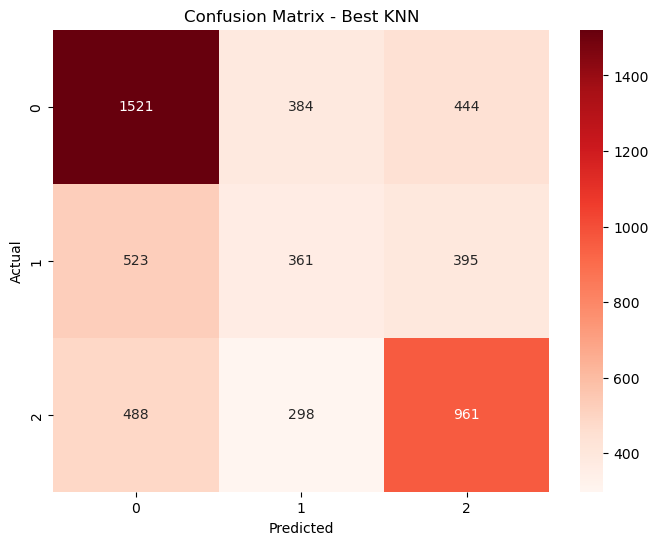

In [110]:
all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

<h1 style="color:red;">KNN - 4 classi</h1>

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50      1725
           1       0.29      0.23      0.26      1136
           2       0.33      0.32      0.33      1176
           3       0.44      0.45      0.44      1338

    accuracy                           0.40      5375
   macro avg       0.38      0.38      0.38      5375
weighted avg       0.39      0.40      0.40      5375



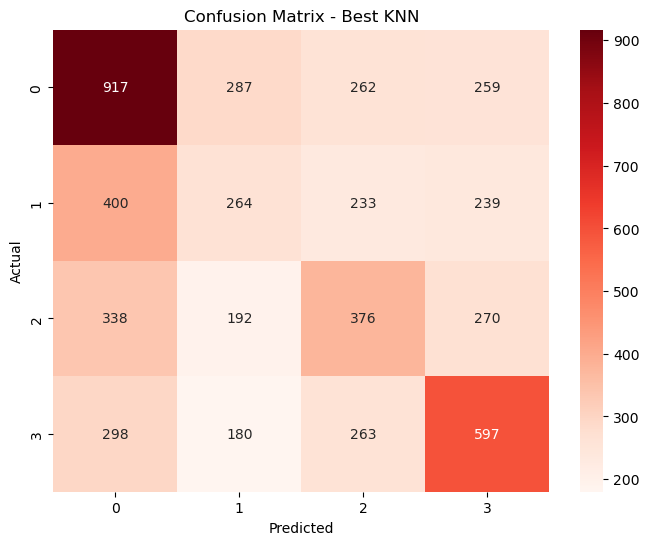

In [112]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69      1725
           1       0.43      0.43      0.43      1136
           2       0.45      0.43      0.44      1176
           3       0.65      0.58      0.62      1338

    accuracy                           0.56      5375
   macro avg       0.55      0.54      0.54      5375
weighted avg       0.56      0.56      0.56      5375



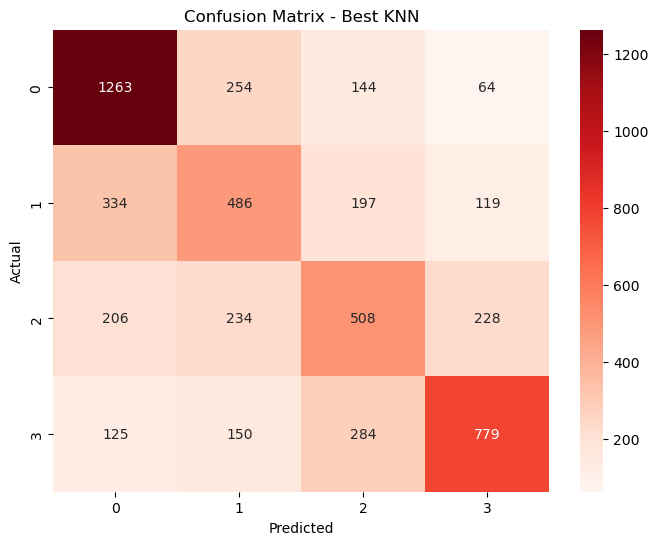

In [113]:
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

Migliori iperparametri trovati: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.56      0.54      1725
           1       0.31      0.26      0.29      1136
           2       0.36      0.37      0.36      1176
           3       0.48      0.48      0.48      1338

    accuracy                           0.43      5375
   macro avg       0.42      0.42      0.42      5375
weighted avg       0.43      0.43      0.43      5375



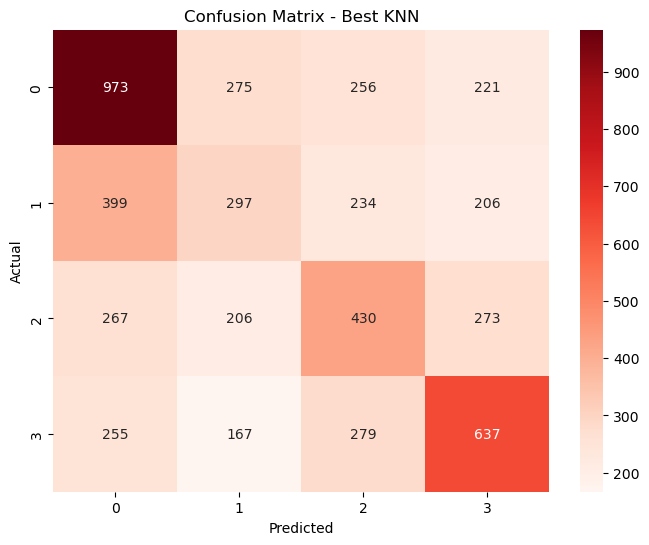

In [114]:
all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione della griglia degli iperparametri
param_grid = {
    'n_neighbors': [3, 5,10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV con 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

# Miglior modello
best_knn = grid.best_estimator_

# Predizioni sul test set
y_pred = best_knn.predict(X_test)

# Report di classificazione
print("Migliori iperparametri trovati:", grid.best_params_)
print("\nKNN - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best KNN')
plt.show()

<h1 style="color:red;">LogReg - Binaria</h1>

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      2665
           1       0.64      0.65      0.65      2710

    accuracy                           0.64      5375
   macro avg       0.64      0.64      0.64      5375
weighted avg       0.64      0.64      0.64      5375

Confusion Matrix:
[[1675  990]
 [ 937 1773]]


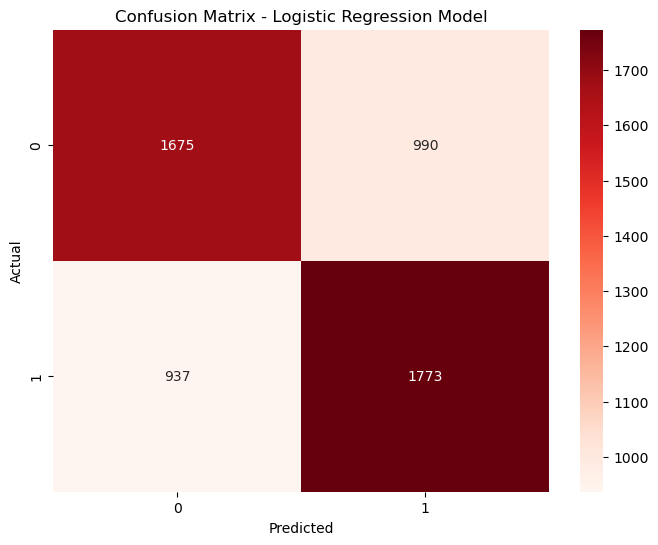

In [172]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Usa i dati scalati

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Usa i dati di test scalati

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2665
           1       0.75      0.55      0.63      2710

    accuracy                           0.68      5375
   macro avg       0.69      0.68      0.67      5375
weighted avg       0.69      0.68      0.67      5375

Confusion Matrix:
[[2159  506]
 [1222 1488]]


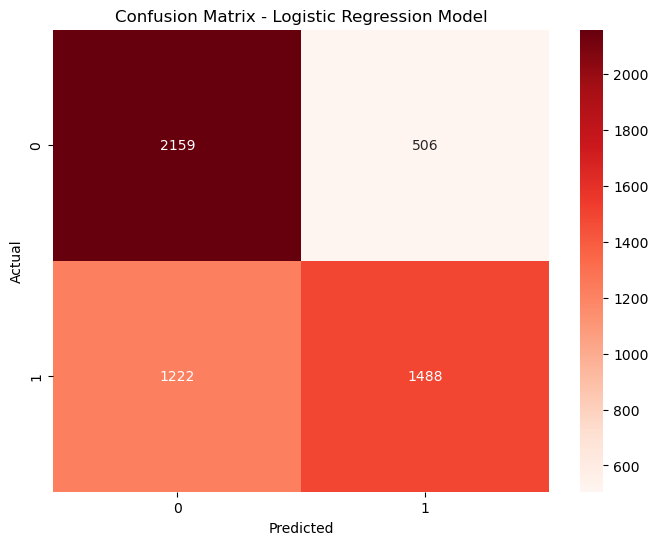

In [174]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

X = df[blockchain_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Usa i dati scalati

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Usa i dati di test scalati

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      2665
           1       0.71      0.66      0.68      2710

    accuracy                           0.69      5375
   macro avg       0.69      0.69      0.69      5375
weighted avg       0.69      0.69      0.69      5375

Confusion Matrix:
[[1938  727]
 [ 933 1777]]


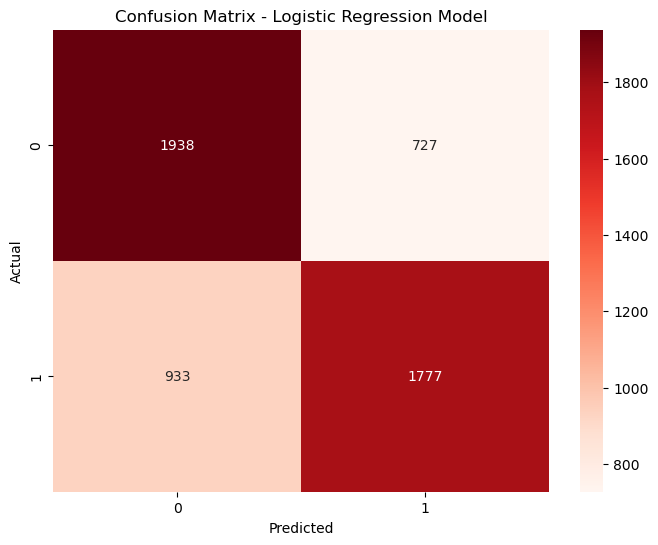

In [176]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
    'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
    'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
    'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
    'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
    'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
    'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
    'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
    'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
    'week_google_searches_ethereum','week_google_searches_optimism']

X = df[all_features]
y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Usa i dati scalati

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Usa i dati di test scalati

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

<h1 style="color:red;">LogReg - 3 classi</h1>

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      2349
           1       0.30      0.29      0.30      1279
           2       0.49      0.58      0.53      1747

    accuracy                           0.49      5375
   macro avg       0.47      0.47      0.47      5375
weighted avg       0.50      0.49      0.49      5375

Confusion Matrix:
[[1263  522  564]
 [ 417  375  487]
 [ 377  364 1006]]


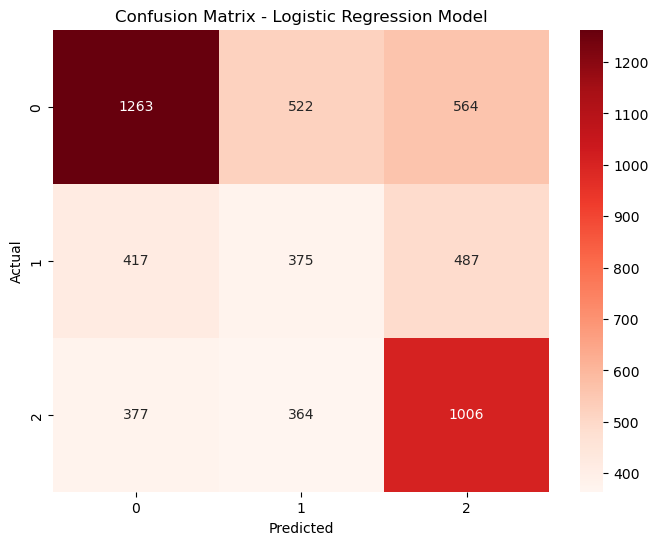

In [166]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dati
text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass3']

# Suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Modifica da X_train a X_train_scaled

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Modifica da X_test a X_test_scaled

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      2349
           1       0.31      0.34      0.32      1279
           2       0.65      0.50      0.57      1747

    accuracy                           0.54      5375
   macro avg       0.52      0.50      0.51      5375
weighted avg       0.55      0.54      0.54      5375

Confusion Matrix:
[[1589  503  257]
 [ 644  433  202]
 [ 410  468  869]]


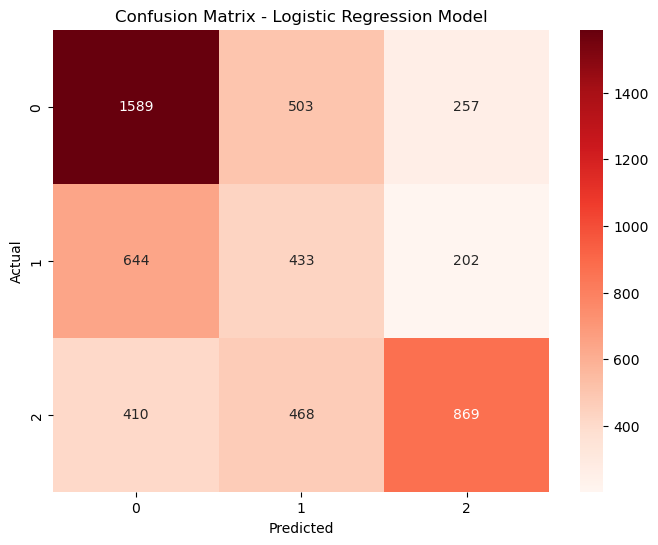

In [168]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione delle features
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

# Definisci X e y
X = df[blockchain_features]  # Usa blockchain_features qui
y = df['SuccessClass3']

# Suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Usa i dati scalati

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Usa i dati di test scalati

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.62      0.64      2349
           1       0.34      0.41      0.37      1279
           2       0.61      0.55      0.58      1747

    accuracy                           0.55      5375
   macro avg       0.53      0.53      0.53      5375
weighted avg       0.56      0.55      0.56      5375



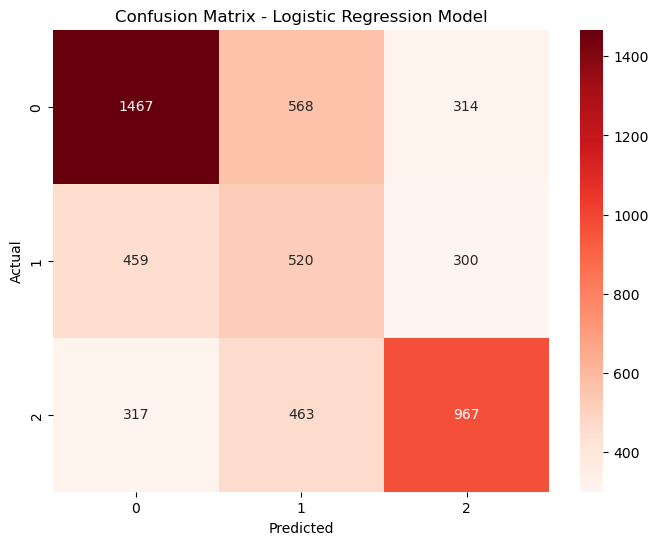

In [170]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione delle features
all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
                'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
                'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
                'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
                'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
                'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
                'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
                'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
                'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
                'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                'week_google_searches_ethereum','week_google_searches_optimism']

# Definisci X e y
X = df[all_features]  # Usa all_features qui
y = df['SuccessClass3']

# Suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Usa i dati scalati

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Usa i dati di test scalati

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()


<h1 style="color:red;">LogReg - 4 classi</h1>

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1725
           1       0.28      0.22      0.24      1136
           2       0.29      0.23      0.25      1176
           3       0.40      0.52      0.45      1338

    accuracy                           0.40      5375
   macro avg       0.37      0.37      0.37      5375
weighted avg       0.38      0.40      0.39      5375

Confusion Matrix:
[[923 269 195 338]
 [362 245 215 314]
 [315 217 266 378]
 [247 144 254 693]]


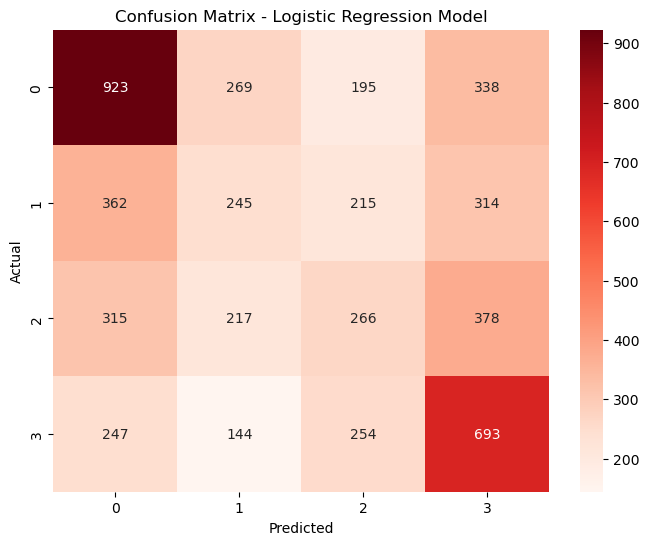

In [180]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dati
text_features = [
    'timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
    'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
    'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
    'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
    'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
    'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
    'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
    'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
    'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch'
]

X = df[text_features]
y = df['SuccessClass4']

# Suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Modifica da X_train a X_train_scaled

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Modifica da X_test a X_test_scaled

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50      1725
           1       0.30      0.34      0.32      1136
           2       0.32      0.24      0.28      1176
           3       0.56      0.52      0.54      1338

    accuracy                           0.43      5375
   macro avg       0.41      0.41      0.41      5375
weighted avg       0.42      0.43      0.42      5375

Confusion Matrix:
[[913 450 161 201]
 [450 390 168 128]
 [366 303 287 220]
 [216 137 283 702]]


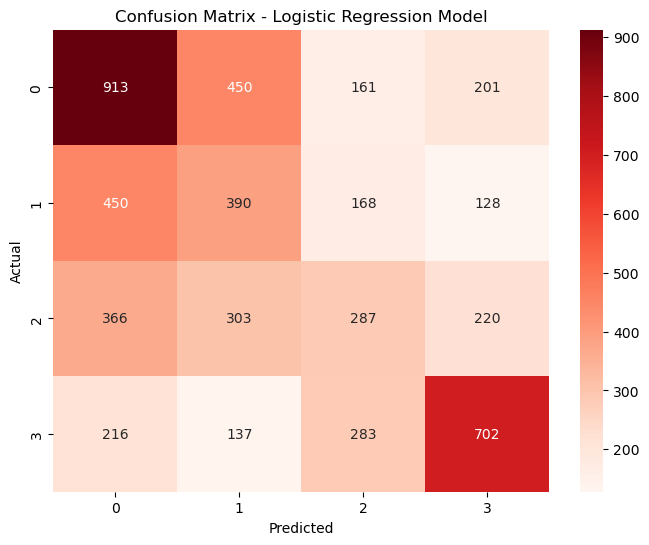

In [182]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione delle features
blockchain_features = ['last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                       'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                       'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                       'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                       'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                       'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                       'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                       'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                       'week_google_searches_ethereum','week_google_searches_optimism']

# Definisci X e y
X = df[blockchain_features]  # Usa blockchain_features qui
y = df['SuccessClass4']

# Suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Usa i dati scalati

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Usa i dati di test scalati

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.57      0.55      1725
           1       0.32      0.33      0.33      1136
           2       0.34      0.30      0.32      1176
           3       0.56      0.54      0.55      1338

    accuracy                           0.45      5375
   macro avg       0.44      0.44      0.44      5375
weighted avg       0.45      0.45      0.45      5375



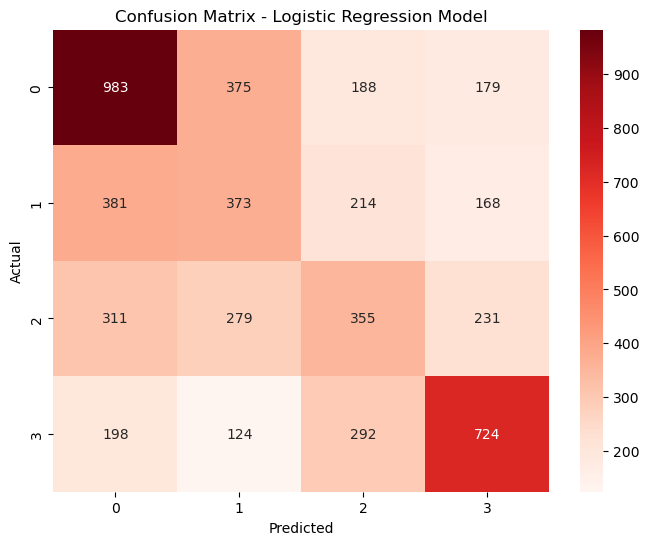

In [184]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Definizione delle features
all_features = ['timestamp', 'year', 'month', 'day', 'cleaned_text_sentiment', 'words_body', 'words_title', 'words_text',
                'normalized_tfidf_sum', 'nft', 'web3', 'community', 'blockchain', 'crypto', 'wallet', 'chain',
                'verbs_density', 'adjectives_density', 'nouns_density', 'Kincaid', 'FleschReadingEase', 'GunningFogIndex',
                'characters_per_word', 'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph', 'type_token_ratio',
                'characters', 'syllables', 'words', 'wordtypes', 'sentences', 'paragraphs', 'long_words', 'complex_words',
                'topic_T1: Gaming, Virtual Worlds & Characters', 'topic_T2: Wallets, Airdrops & Ethereum Tools',
                'topic_T3: Web3, Blockchain & Digital Platforms', 'topic_T4: DeFi, Market Strategies & Liquidity',
                'topic_T5: Blockchain, Transactions & Smart Contracts', 'topic_T6: Web3 Launches, Rewards & Creators',
                'topic_T7: Human Thoughts, Emotions & Reflections', 'days_since_epoch',
                'last_btc_usd','open_btc_usd','max_btc_usd','min_btc_usd','vol_btc','var%_btc','last_eth_usd','open_eth_usd',
                'max_eth_usd','min_eth_usd','vol_eth','var%_eth','authorPostCount','authorTotalSales','authorTotalRevenue',
                'last_optimism_usd','open_optimism_usd','max_optimism_usd','min_optimism_usd','vol_optimism','var%_optimism',
                'last_tether_usd','open_tether_usd','max_tether_usd','min_tether_usd','vol_tether','var%_tether','last_usdc_usd',
                'open_usdc_usd','max_usdc_usd','min_usdc_usd','vol_usdc','var%_usdc','last_dai_usd','open_dai_usd','max_dai_usd',
                'min_dai_usd','vol_dai','var%_dai','daily_transactions_optimism','eth_active_addresses_total',
                'eth_active_addresses_receiver','eth_active_addresses_sender','optimism_active_addresses_total',
                'week_google_searches_nft','week_google_searches_crypto','week_google_searches_bitcoin',
                'week_google_searches_ethereum','week_google_searches_optimism']

# Definisci X e y
X = df[all_features]  # Usa all_features qui
y = df['SuccessClass4']

# Suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modello con bilanciamento automatico delle classi
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)  # Usa i dati scalati

# Predizioni
y_pred = logreg.predict(X_test_scaled)  # Usa i dati di test scalati

# Valutazione
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)

# Visualizzazione grafica della confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Reds", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()